In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Monday Data

In [ ]:
# Plotting function


# Function to calculate distortion and propagate uncertainty
def calculate_distortion(data, error):
    reference = data[0]  # First value is the reference magnification
    distortion = (data - reference) / reference * 100  # Distortion formula

    a = error / data[0]
    b = error[0] * data / (data[0] ** 2)
    distortion_error = np.sqrt(a**2 + b**2) * 100
    return distortion, distortion_error


def plot(groups, title):
    # Plot each group individually
    plt.figure(figsize=(8, 5))

    for data, error, label, marker in groups:
        x = np.arange(1, len(data) + 1)  # Create x-values matching the data indices
        distortion, distortion_error = calculate_distortion(data, error)

        # Interpolation for smooth curve
        x_smooth = np.linspace(x.min(), x.max(), 500)  # Generate fine x-axis
        distortion_smooth = make_interp_spline(x, distortion)(x_smooth)

        plt.errorbar(
            x, distortion, yerr=distortion_error, fmt=marker, label=label, capsize=5
        )
        # plt.plot(
        #     x_smooth,
        #     distortion_smooth,
        #     color="k",
        #     linewidth=1,
        #     alpha=0.2,
        # )
        plt.axhline(
            0, color="gray", linestyle="--", linewidth=1
        )  # Add a horizontal line at 0
    plt.xlabel("Off-Axis Distance (lens) [mm]")
    plt.ylabel("Distortion [%]")
    plt.ylim(-30, 80)
    plt.title(f"{title}")
    plt.grid()
    plt.legend()
    plt.savefig(f"Plots/{title}")
    plt.show()

In [78]:
# Changing Aperture size
first = np.array([1.95, 2.12, 2.03, 2.05, 1.95, 2.17])
ufirst = np.array([0.01, 0.03, 0.05, 0.04, 0.03, 0.06])

second = np.array([2.01, 2.16, 2.0, 2.01, 2.0, 2.12, 2.22, 2.26, 2.7])
usecond = np.array([0.06, 0.02, 0.05, 0.05, 0.01, 0.01, 0.03, 0.04, 0.1])

third = np.array([2.03, 2.16, 2.06, 2.01, 1.96, 2.17, 2.2, 2.26, 2.62])

uthird = np.array([0.03, 0.01, 0.02, 0.05, 0.02, 0.08, 0.03, 0.02, 0.02])

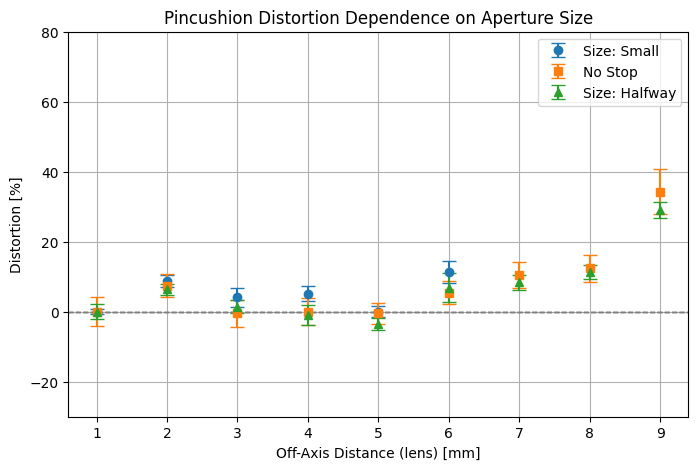

In [79]:
# Plot effect of aperture size
groups = [
    (first, ufirst, "Size: Small", "o"),
    (second, usecond, "No Stop", "s"),
    (third, uthird, "Size: Halfway", "^"),
]
plot(groups, "Pincushion Distortion Dependence on Aperture Size")

In [80]:
# Changing aperture position

first = np.array([2, 2.12, 2.07, 2.07])
ufirst = np.array([0.07, 0.01, 0.03, 0.04])

second = np.array([2.06, 2.15, 2.05, 2.05, 1.95, 2.12, 2.23, 2.28])
usecond = np.array([0.03, 0.04, 0.01, 0.06, 0.05, 0.04, 0.04, 0.04])

third = np.array([2.11, 2.11, 2.13, 2.04, 1.96, 2.12, 2.21, 2.29, 2.59])

uthird = np.array([0.02, 0.01, 0.03, 0.03, 0.06, 0.02, 0.04, 0.01, 0.01])

barrel = np.array([0.74, 0.63, 0.66, 0.66, 0.56])
ubarrel = np.array([0.05, 0.02, 0.02, 0.01, 0.02])

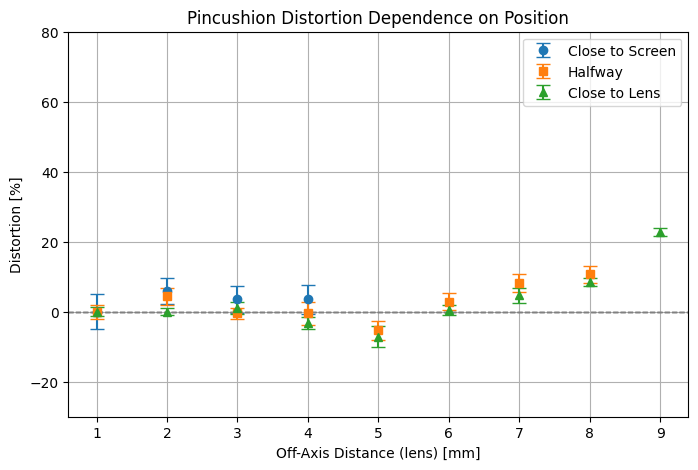

In [81]:
# Plot of changing position of aperture
groups = [
    (first, ufirst, "Close to Screen", "o"),
    (second, usecond, "Halfway", "s"),
    (third, uthird, "Close to Lens", "^"),
]
plot(groups, "Pincushion Distortion Dependence on Position")

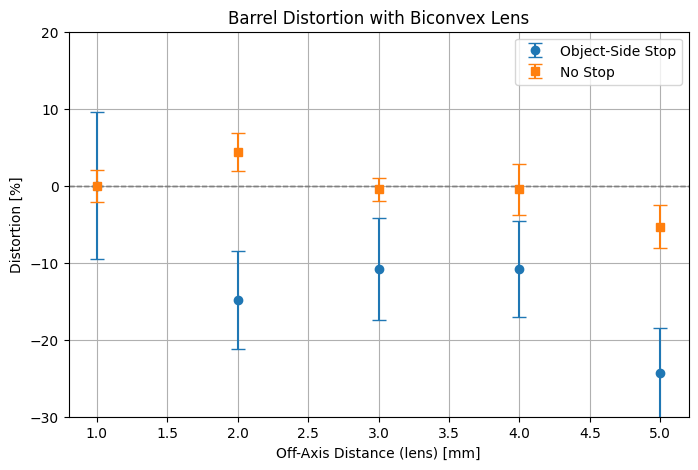

In [84]:
# Plot first barrel attempt
groups = [
    (barrel, ubarrel, "Object-Side Stop", "o"),
    (second[:5], usecond[:5], "No Stop", "s"),
]
plot(groups, "Barrel Distortion with Biconvex Lens")